# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
!pip install ucimlrepo

In [2]:
# Base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from ucimlrepo import fetch_ucirepo

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

## From Author
Data ini diambil dari machine learning repository tentang Online Retail.

Masalah yang akan diangkat adalah customer segmentation.
1. **Klasterisasi** digunakan untuk mengelompokkan pelanggan berdasarkan pola belanja.
2. **Klasifikasi** digunakan untuk melakukan segmentasi pelanggan untuk memprediksi pelanggan baru berdasarkan pola belanjanya.

Selain itu, dilakukan RFM (Recency, Frequency, Monetary) Analysis untuk memahami perilaku pelanggan.
- Recency (R) - Seberapa baru pelanggan melakukan pembelian.
- Frequency (F) - Seberapa sering pelanggan membeli.
- Monetary (M) - Berapa banyak uang yang telah mereka belanjakan.

In [3]:
online_retail_df = fetch_ucirepo(id=352)

df = online_retail_df.data.features

In [4]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df.to_csv('online_retail.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [7]:
df['InvoiceDate'].nunique()

23260

In [8]:
df.isnull().sum()

,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Konversi tipe data ke tanggal dan waktu

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-9-1f26bb90d392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Cek duplikat

In [10]:
df.duplicated().sum()

6007

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Insight:
RFM adalah tahapan pertama yang perlu ditempuh. Dengan domain knowledge (author submission ini), dipilih kolom-kolom berikut untuk melakukan customer segmentation.

1. CustomerID
2. UnitPrice
3. InvoiceDate
4. Quantity

RFM Meaning:
- Recency - Seberapa baru pelanggan terakhir membeli sesuatu
- Frequency - Berapa kali pelanggan melakukan transaksi
- Monetary - Berapa banyak uang yang dibelanjakan.

## RFM Analysis

### Step 1:
Karena ada nilai NULL pada CustomerID, kita perlu drop nilai null nya untuk menghindari customer fiktif.

In [11]:
df_clean = df.dropna(subset=['CustomerID'])

In [12]:
df_clean.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


### Step 2:
Untuk memastikan setiap data unik, kita perlu drop nilai yang duplikat.

In [13]:
df_clean = df_clean.drop_duplicates()

In [14]:
df_clean.duplicated().sum()

0

### Step 3: Menghilangkan kolom yang tidak digunakan.

In [15]:
df_clean = df_clean.drop(columns=['Description'])

In [16]:
df_clean

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,4,2011-12-09 12:50:00,4.15,12680.0,France


### Step 4: Melakukan aggregasi untuk menghitung retency, frequency, dan monetary.

In [17]:
reference_date = df_clean['InvoiceDate'].max()

In [18]:
df_clean['InvoiceDate_duplicate'] = df_clean['InvoiceDate']

In [19]:
df_clean

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_duplicate
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00
541905,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00
541906,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
541907,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00


In [20]:
rfm_df = df_clean.groupby(['CustomerID', 'Country']).agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceDate_duplicate': 'count',
    'UnitPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceDate_duplicate': 'Frequency', 'UnitPrice': 'Monetary'}).reset_index()

In [21]:
rfm_df

,CustomerID,Country,Recency,Frequency,Monetary
0,12346.0,United Kingdom,325,2,2.08
1,12347.0,Iceland,1,182,481.21
2,12348.0,Finland,74,31,178.71
3,12349.0,Italy,18,73,605.10
4,12350.0,Norway,309,17,65.30
...,...,...,...,...,...
4375,18280.0,United Kingdom,277,10,47.65
4376,18281.0,United Kingdom,180,7,39.36
4377,18282.0,United Kingdom,7,13,62.68
4378,18283.0,United Kingdom,3,721,1174.33


### Step 5: Visualisasi

#### Histogram
Ditujukan untuk melihat distribusi antara Recency, Frequency, dan Monetary

Insight:
Dari visualisasi ini, terlihat jelas kalau kolom Frequency dan Monetary memiliki outlier yang sangat besar.

Text(0.5, 1.0, 'Distribusi Monetary')

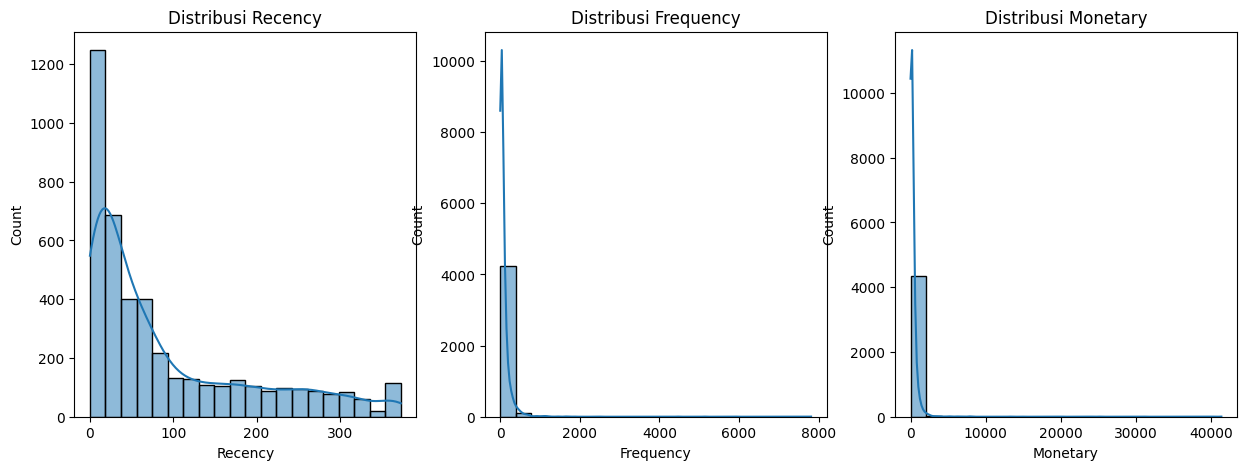

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(x=rfm_df['Recency'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Recency')

sns.histplot(rfm_df['Frequency'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribusi Frequency')

sns.histplot(rfm_df['Monetary'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribusi Monetary')

#### Mencari Outliers
Mencari outliers di kolom Recency, Frequency dan Monetary dengan boxplot.

Text(0.5, 1.0, 'Outliers')

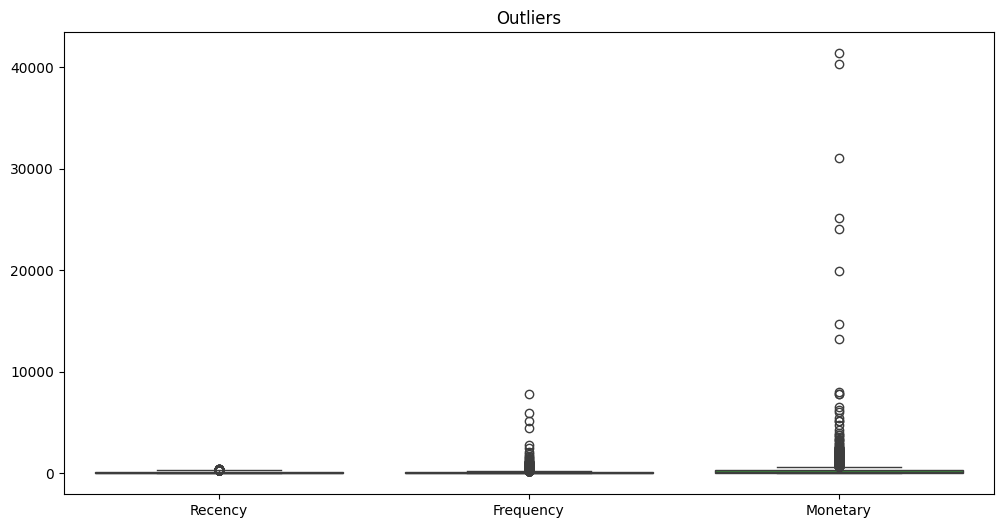

In [23]:
plt.figure(figsize=[12,6])
sns.boxplot(data=rfm_df[['Recency','Frequency', 'Monetary']])
plt.title('Outliers')

#### Menangani Outliers

In [24]:
# Ambil hanya kolom numerik
numeric_cols = rfm_df.select_dtypes(include=['number'])

# Hitung Q1 (kuartil 25%) dan Q3 (kuartil 75%)
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
IQR = q3 - q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Filter data dengan menghapus outlier di semua kolom numerik
rfm_df_clean = rfm_df[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

# Tampilkan data yang sudah dibersihkan
rfm_df_clean

,CustomerID,Country,Recency,Frequency,Monetary
0,12346.0,United Kingdom,325,2,2.08
1,12347.0,Iceland,1,182,481.21
2,12348.0,Finland,74,31,178.71
3,12349.0,Italy,18,73,605.10
4,12350.0,Norway,309,17,65.30
...,...,...,...,...,...
4374,18278.0,United Kingdom,73,9,29.55
4375,18280.0,United Kingdom,277,10,47.65
4376,18281.0,United Kingdom,180,7,39.36
4377,18282.0,United Kingdom,7,13,62.68


#### Melakukan pengecekan distribusi kembali.
Insight:
Berdasarkan distribusi terbaru, dapat disimpulkan bahwa distribusi data belum mencapai distribusi normal.


Sehingga, kita perlu melakukan normalisasi.

Text(0.5, 1.0, 'Distribusi Monetary')

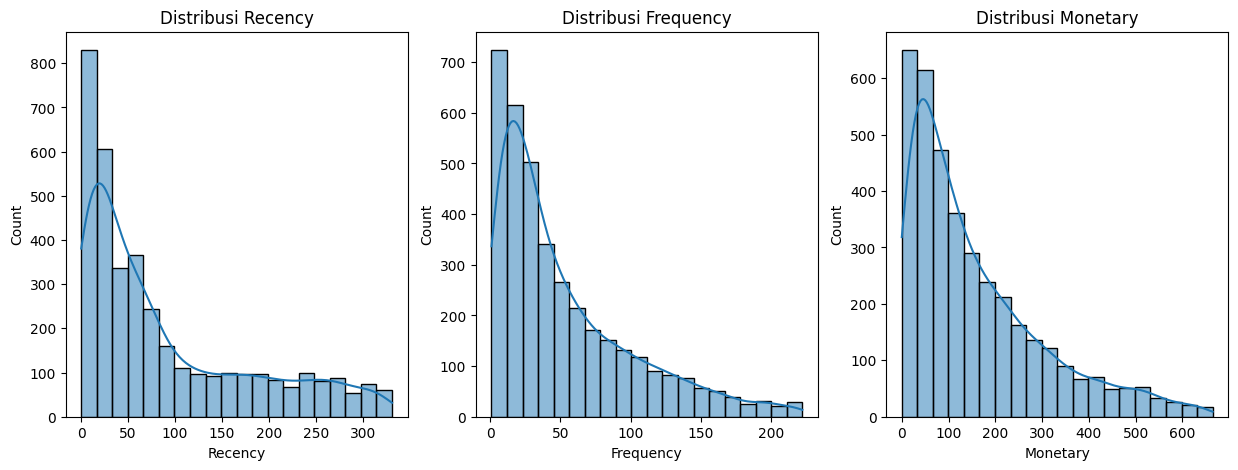

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(x=rfm_df_clean['Recency'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Recency')

sns.histplot(rfm_df_clean['Frequency'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribusi Frequency')

sns.histplot(rfm_df_clean['Monetary'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribusi Monetary')

#### Melakukan One-hot Encoding untuk kolom country

In [26]:
# Berapakah country yang terdaftar?
rfm_df_clean['Country'].unique()

array(['United Kingdom', 'Iceland', 'Finland', 'Italy', 'Norway',
       'Bahrain', 'Spain', 'Portugal', 'Switzerland', 'Austria',
       'Belgium', 'Unspecified', 'Denmark', 'Cyprus', 'Australia',
       'France', 'Germany', 'RSA', 'Greece', 'Sweden', 'Israel', 'USA',
       'Saudi Arabia', 'Poland', 'United Arab Emirates', 'Japan',
       'Netherlands', 'Lebanon', 'Brazil', 'Czech Republic', 'EIRE',
       'Channel Islands', 'European Community', 'Canada', 'Malta'],
      dtype=object)

Drop unspecified country

In [27]:
rfm_df_clean = rfm_df_clean[rfm_df_clean['Country'] != 'Unspecified']

In [28]:
rfm_df_clean

,CustomerID,Country,Recency,Frequency,Monetary
0,12346.0,United Kingdom,325,2,2.08
1,12347.0,Iceland,1,182,481.21
2,12348.0,Finland,74,31,178.71
3,12349.0,Italy,18,73,605.10
4,12350.0,Norway,309,17,65.30
...,...,...,...,...,...
4374,18278.0,United Kingdom,73,9,29.55
4375,18280.0,United Kingdom,277,10,47.65
4376,18281.0,United Kingdom,180,7,39.36
4377,18282.0,United Kingdom,7,13,62.68


Berapa banyak kemunculan masing-masing country?

In [29]:
# Berapa banyak kemunculan masing-masing country?
freq_country = rfm_df_clean['Country'].value_counts()
freq_country

,count
Country,
United Kingdom,3399
Germany,71
France,66
Spain,24
Belgium,22
Switzerland,19
Portugal,14
Italy,12
Finland,11


In [30]:
rfm_df_encoded = pd.get_dummies(rfm_df_clean, columns=['Country'], dtype='int64')

In [31]:
rfm_df_encoded

,CustomerID,Recency,Frequency,Monetary,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom
0,12346.0,325,2,2.08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12347.0,1,182,481.21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,74,31,178.71,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,18,73,605.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,309,17,65.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,18278.0,73,9,29.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4375,18280.0,277,10,47.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4376,18281.0,180,7,39.36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4377,18282.0,7,13,62.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Melakukan normalisasi.

In [32]:
rfm_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 0 to 4379
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3736 non-null   float64
 1   Recency                       3736 non-null   int64  
 2   Frequency                     3736 non-null   int64  
 3   Monetary                      3736 non-null   float64
 4   Country_Australia             3736 non-null   int64  
 5   Country_Austria               3736 non-null   int64  
 6   Country_Bahrain               3736 non-null   int64  
 7   Country_Belgium               3736 non-null   int64  
 8   Country_Brazil                3736 non-null   int64  
 9   Country_Canada                3736 non-null   int64  
 10  Country_Channel Islands       3736 non-null   int64  
 11  Country_Cyprus                3736 non-null   int64  
 12  Country_Czech Republic        3736 non-null   int64  
 13  Country_

### Bucketizing Normalization
Dilakukan ketika distribusi data tidak normal dan memiliki outlier yang signifikan.

In [33]:
rfm_df_encoded['Recency_bucket_norm'] = pd.qcut(rfm_df_encoded['Recency'], q=4, labels=range(4,0,-1)).astype('int64')
rfm_df_encoded['Frequency_bucket_norm'] = pd.qcut(rfm_df_encoded['Frequency'], q=4, labels=range(1, 5)).astype('int64')
rfm_df_encoded['Monetary_bucket_norm'] = pd.qcut(rfm_df_encoded['Monetary'], q=4, labels=range(1, 5)).astype('int64')

In [34]:
X = rfm_df_encoded

In [35]:
X = rfm_df_encoded.drop(columns=['CustomerID', 'Recency', 'Frequency', 'Monetary'])
X

,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,...,Country_Saudi Arabia,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Recency_bucket_norm,Frequency_bucket_norm,Monetary_bucket_norm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,3,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,1
4375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,1,2


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 0 to 4379
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Country_Australia             3736 non-null   int64
 1   Country_Austria               3736 non-null   int64
 2   Country_Bahrain               3736 non-null   int64
 3   Country_Belgium               3736 non-null   int64
 4   Country_Brazil                3736 non-null   int64
 5   Country_Canada                3736 non-null   int64
 6   Country_Channel Islands       3736 non-null   int64
 7   Country_Cyprus                3736 non-null   int64
 8   Country_Czech Republic        3736 non-null   int64
 9   Country_Denmark               3736 non-null   int64
 10  Country_EIRE                  3736 non-null   int64
 11  Country_European Community    3736 non-null   int64
 12  Country_Finland               3736 non-null   int64
 13  Country_France                3736 non

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Summary:
**Algoritma yang dipilih adalah KMeans dan DBSCAN**

### Elbow Method untuk menentukan jumlah cluster

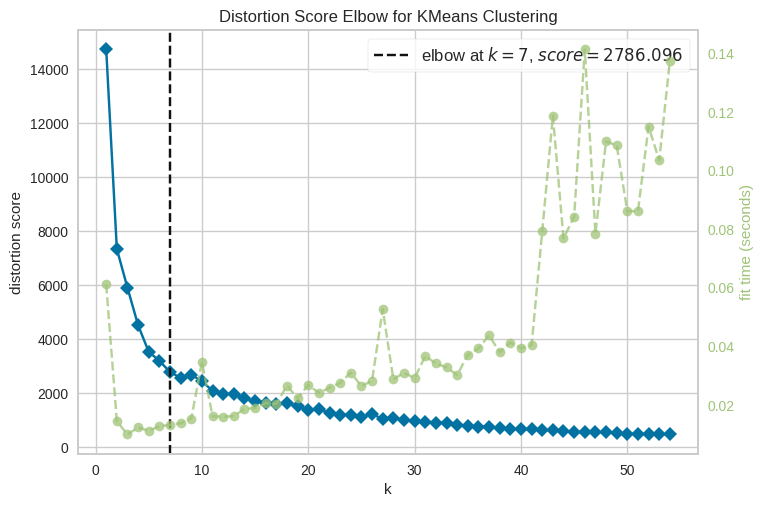

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1,55))
visualizer.fit(X)

visualizer.show()

### KMeans Application

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=1)
kmeans.fit(X)

X['y_pred'] = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [39]:
from sklearn.metrics import silhouette_score

score_origin = silhouette_score(X=X, labels=X['y_pred'])
print(f"Silhouette score: {score_origin: .4f}")

Silhouette score:  0.6875


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

#### Implement Feature Selection dengan VarianceThreshold

In [40]:
X_selected_origin = X.drop(columns=['y_pred'])
X_selected_origin

,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,...,Country_Saudi Arabia,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Recency_bucket_norm,Frequency_bucket_norm,Monetary_bucket_norm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,3,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,1
4375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,1,2


In [41]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_selected_origin)

In [42]:
X_selected

array([[1, 1, 1],
       [4, 4, 4],
       [2, 2, 3],
       ...,
       [1, 1, 1],
       [4, 1, 2],
       [3, 3, 2]])

In [43]:
selected_features = X_selected_origin.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected_origin, columns=selected_features)

In [44]:
selected_features

Index(['Recency_bucket_norm', 'Frequency_bucket_norm', 'Monetary_bucket_norm'], dtype='object')

In [45]:
X_selected_df

,Recency_bucket_norm,Frequency_bucket_norm,Monetary_bucket_norm
0,1,1,1
1,4,4,4
2,2,2,3
3,4,3,4
4,1,2,2
...,...,...,...
4374,2,1,1
4375,1,1,1
4376,1,1,1
4377,4,1,2


In [46]:
from sklearn.cluster import KMeans

kmeans_selected = KMeans(n_clusters=15, random_state=1)
kmeans_selected.fit(X_selected_df)

X_selected_df['y_pred_selected'] = kmeans_selected.labels_

In [47]:
X_selected_df

,Recency_bucket_norm,Frequency_bucket_norm,Monetary_bucket_norm,y_pred_selected
0,1,1,1,1
1,4,4,4,4
2,2,2,3,0
3,4,3,4,2
4,1,2,2,5
...,...,...,...,...
4374,2,1,1,10
4375,1,1,1,1
4376,1,1,1,1
4377,4,1,2,3


In [48]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X=X_selected_df, labels=X_selected_df['y_pred_selected'])
print(f"Silhouette score: {score: .4f}")

Silhouette score:  0.7746


#### Perbandingan Silhouette Score

In [49]:
print(f"Score SEBELUM feature selection: {score_origin}")
print(f"Score SETELAH feature selection: {score}")

Score SEBELUM feature selection: 0.6874817410411009
Score SETELAH feature selection: 0.7746170103064212


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [50]:
rfm_df_clean['Klaster'] = X_selected_df['y_pred_selected'].astype('int64')
rfm_df_clean

<ipython-input-50-e90983924867>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_clean['Klaster'] = X_selected_df['y_pred_selected'].astype('int64')


,CustomerID,Country,Recency,Frequency,Monetary,Klaster
0,12346.0,United Kingdom,325,2,2.08,1
1,12347.0,Iceland,1,182,481.21,4
2,12348.0,Finland,74,31,178.71,0
3,12349.0,Italy,18,73,605.10,2
4,12350.0,Norway,309,17,65.30,5
...,...,...,...,...,...,...
4374,18278.0,United Kingdom,73,9,29.55,10
4375,18280.0,United Kingdom,277,10,47.65,1
4376,18281.0,United Kingdom,180,7,39.36,1
4377,18282.0,United Kingdom,7,13,62.68,3


In [51]:
rfm_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 0 to 4379
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3736 non-null   float64
 1   Country     3736 non-null   object 
 2   Recency     3736 non-null   int64  
 3   Frequency   3736 non-null   int64  
 4   Monetary    3736 non-null   float64
 5   Klaster     3736 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 204.3+ KB


Text(0.5, 1.0, 'Cluster Monetary')

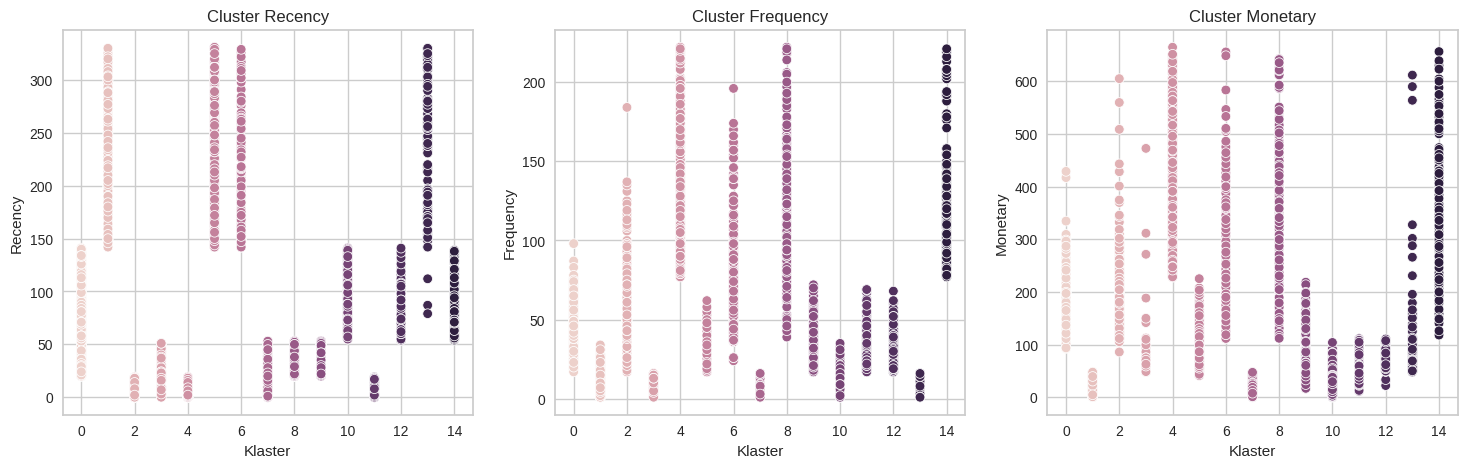

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=rfm_df_clean, x='Klaster', y='Recency', hue='Klaster', ax=axes[0], legend=False)
axes[0].set_title('Cluster Recency')

sns.scatterplot(data=rfm_df_clean, x='Klaster', y='Frequency', hue='Klaster', ax=axes[1], legend=False)
axes[1].set_title('Cluster Frequency')

sns.scatterplot(data=rfm_df_clean, x='Klaster', y='Monetary', hue='Klaster', ax=axes[2], legend=False)
axes[2].set_title('Cluster Monetary')

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [53]:
# Tidak dilakukan denormalisasi di sini.

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [54]:
# Tidak dilakukan denormalisasi di sini.

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [55]:
summary_df = rfm_df_clean.groupby('Klaster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
summary_df

,Recency,Frequency,Monetary
Klaster,,,
0,66.562341,51.376590,172.565832
1,234.704110,9.430137,24.220356
2,8.453376,61.755627,190.358553
3,24.876923,12.276923,85.632154
4,7.532164,137.672515,397.214181
5,231.386207,27.672414,95.011862
6,209.118919,74.259459,248.588222
7,25.995652,8.073913,20.533435
8,33.202985,114.295522,325.013343


## Interpretasi
Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Recency: Rata-rata adalah 66 hari.
- Frequency: Rata-rata adalah 51 transaksi.
- Monetary: Rata-rata adalah 172 poundsterling.
- Analisis:
Kelompok ini bisa diasumsikan seperti orang yang baru belanja tapi tidak terlalu sering --moderate--. Namun, sekalinya belanja mengeluarkan uang yang cukup banyak.

2. Cluster 2:
- Recency: Rata-rata adalah 234 hari.
- Frequency: Rata-rata adalah 9 transaksi.
- Monetary: Rata-rata adalah 24 poundsterling.
- Analisis:
Kelompok ini jarang sekali berbelanja dengan frekuensi belanja dan uang yang dikeluarkan juga kecil.

3. Cluster 3:
- Recency: Rata-rata adalah 8 hari.
- Frequency: Rata-rata adalah 61 transaksi.
- Monetary: Rata-rata adalah 190 poundsterling.
- Analisis:
Kelompok ini sering berbelanja dan saat belanja uang yang dikeluarkan cukup banyak.

4. Cluster 4:
- Recency: Rata-rata adalah 24 hari.
- Frequency: Rata-rata adalah 12 transaksi.
- Monetary: Rata-rata adalah 85 poundsterling.
- Analisis:
Kelompok ini hampir satu bulan belum belanja dengan frekuensi pembeliannya moderate dan pengeluarannya aga kecil.

5. Cluster 5:
- Recency: Rata-rata adalah 7 hari.
- Frequency: Rata-rata adalah 137 transaksi.
- Monetary: Rata-rata adalah 397 poundsterling.
- Analisis:
Kelompok ini sering berbelanja bahkan transaksinya cenderung lebih besar dengan pengeluaran belanjanya tinggi di angka rata-rata 397 pounds.

6. Cluster 6:
- Recency: Rata-rata adalah 231 hari.
- Frequency: Rata-rata adalah 27 transaksi.
- Monetary: Rata-rata adalah 95 poundsterling.
- Analisis:
Kelompok ini jarang berbelanja dengan pengeluaran yang tidak terlalu besar.

7. Cluster 7:
- Recency: Rata-rata adalah 209 hari.
- Frequency: Rata-rata adalah 74 transaksi.
- Monetary: Rata-rata adalah 248 poundsterling.
- Analisis:
Kelompok ini dulunya sering berbelanja dan mengeluarkan cukup banyak uang.

8. Cluster 8:
- Recency: Rata-rata adalah 25 hari.
- Frequency: Rata-rata adalah 8 transaksi.
- Monetary: Rata-rata adalah 20 poundsterling.
- Analisis:
Kelompok ini jarang berbelanja dan mengeluarkan sedikit uang. Kemungkinan pelanggan baru.


9. Cluster 9:
- Recency: Rata-rata adalah 33 hari.
- Frequency: Rata-rata adalah 114 transaksi.
- Monetary: Rata-rata adalah 325 poundsterling.
- Analisis:
Kelompok ini dikategorikan sering bertransaksi, bisa jadi pelanggan aktif dan setia.

10. Cluster 10:
- Recency: Rata-rata adalah 35 hari.
- Frequency: Rata-rata adalah 31 transaksi.
- Monetary: Rata-rata adalah 83 poundsterling.
- Analisis:
Kelompok ini cukup sering berbelanja dengan jumlah transaksi yang lebih rendah dibanding klaster pelanggan.

11. Cluster 11:
- Recency: Rata-rata adalah 89 hari.
- Frequency: Rata-rata adalah 11 transaksi.
- Monetary: Rata-rata adalah 29 poundsterling.
- Analisis:
Kelompok ini tidak sering berbelanja dan pengeluarannya kecil.

12. Cluster 12:
- Recency: Rata-rata adalah 9 hari.
- Frequency: Rata-rata adalah 32 transaksi.
- Monetary: Rata-rata adalah 72 poundsterling.
- Analisis:
Kelompok ini cukup aktif berbelanja dengan frekeunsi transaksi yang cukup rendah.

13. Cluster 13:
- Recency: Rata-rata adalah 85 hari.
- Frequency: Rata-rata adalah 30 transaksi.
- Monetary: Rata-rata adalah 76 poundsterling.
- Analisis:
Kelompok ini cukup sering bertransaksi dulunya dengan pengeluaran uangnya tidak terlalu tinggi.

14. Cluster 14:
- Recency: Rata-rata adalah 234 hari.
- Frequency: Rata-rata adalah 11 transaksi.
- Monetary: Rata-rata adalah 106 poundsterling.
- Analisis:
Kelompok ini sangat jarang berbelanja dan sudah lama tidak melakukan transaksi.

15. Cluster 15:
- Recency: Rata-rata adalah 81 hari.
- Frequency: Rata-rata adalah 119 transaksi.
- Monetary: Rata-rata adalah 341 poundsterling.
- Analisis:
Kelompok ini tergolong pelanggan yang cukup royal dengan frekuensi belanja tinggi, tapi tidak sudah aga lama tidak berbelanja lagi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [56]:
rfm_df_clean.to_csv("RFM.csv")